<div style="width: 100%; overflow: hidden; text-align:center;">
    <h1>INF-477 Redes Neuronales Artificiales</h1>
    <h2>Tarea 2 - Autoencoders, RBMs y ConvNets</h2><br/>
    <div style="width: 50%; float: left;">
        <h3>Gabriel Jara</h3>
        <h4>``gabriel.jara@usm.cl``</h4>
        <h4>13550188-3</h4>
    </div>
    <div style="margin-left: 300px;">
        <h3>Daniel San Martín</h3>
        <h4>``daniel.sanmartinr@sansano.usm.cl``</h4>
        <h4>682016101-5</h4>
    </div>
</div>

## 3 Redes Convolucionales en Google Street View

En esta sección, experimentaremos con redes convolucionales, popularmente conocidas como CNNs ó ConvNets. Para ello trabajaremos con un dataset denominado SVHN (Street View House Numbers) correspondiente a imágenes naturales de dígitos de direcciones de casas obtenidos desde Google Street View. El dataset contiene más de 600.000 imágenes de entrenamiento y 26.032 imágenes de test. Para facilitar la realización de pruebas arquitecturales, el dataset de entrenamiento se divide usualmente en un conjunto pequeño de 73.257 imágenes y un conjunto “extra” de 531.131 imágenes.

<img src="img/figure3.png" width="40%" />

Los datos pueden ser obtenidos (en formato Matlab) ejecutando los siguientes comandos

1. <code>wget http://ufldl.stanford.edu/housenumbers/train_32x32.mat</code>
2. <code>wget http://ufldl.stanford.edu/housenumbers/extra_32x32.mat</code>
3. <code>wget http://ufldl.stanford.edu/housenumbers/test_32x32.mat</code>


(a) Cargue los datos de entrenamiento y pruebas. Empiece trabajando con el conjunto de entrenamiento más pequeño (“train32x32.mat”). Determine el tamaño de las imágenes, el número de clases posibles y el número de ejemplos en cada categoría. Finalmente, visualice 5 imágenes de entrenamiento y 5 de test (elegidas aleatoriamente). Comente.

[0 1 2 3 4 5 6 7 8 9]


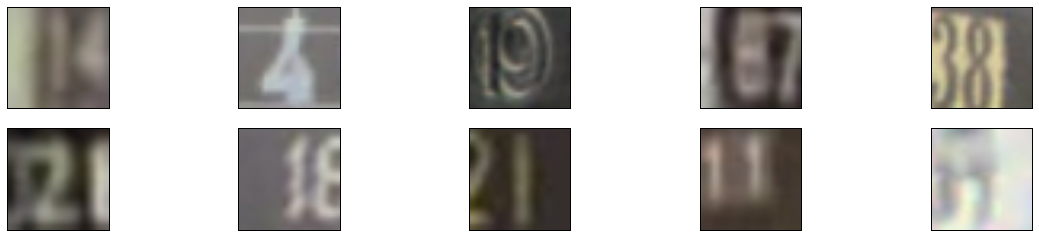

In [1]:
import scipy.io as sio
import numpy as np
from PIL import Image

train_data = sio.loadmat('data/train_32x32.mat')
test_data = sio.loadmat('data/test_32x32.mat')
X_train = train_data['X'].T
y_train = train_data['y'] - 1
X_test = test_data['X'].T
y_test = test_data['y'] - 1
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
n_classes = len(np.unique(y_train))
print np.unique(y_train)

# Plot
%matplotlib inline
import matplotlib.pyplot as plt

n = 5
rand = np.random.randint(0, len(X_test), size=n)
plt.figure(figsize=(20,4))

for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_train[rand[i]].T)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test[rand[i]].T)
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

(b) Normalice las imágenes de entrenamiento y pruebas, dividiendo las intensidades originales de pixel en cada canal por 255. Represente adecuadamente la salida deseada de la red de modo de tener un vector de tamaño igual al número de clases. Antes de seguir, se le recomienda también revisar su archivo de configuración keras.json, para verificar que el índice correspondiente a los canales de una imagen de entrada sea por defecto el 1 y no el 3.

In [2]:
from keras.utils import np_utils
X_train /= 255
X_test /= 255
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print X_train.shape
print X_test.shape
print Y_train.shape
print Y_test.shape

Using Theano backend.
Using gpu device 0: GeForce GT 740M (CNMeM is disabled, cuDNN not available)


(73257L, 3L, 32L, 32L)
(26032L, 3L, 32L, 32L)
(73257L, 10L)
(26032L, 10L)


(c) Defina una CNN con 2 niveles convolucionales (cada una de ellas seguida de una capa de pooling) y 2 capas MLP clásicas completamente conectadas (una oculta y una de salida). Para la primera capa convolucional utilice 16 filtros de 5 × 5 y para la segunda 512 filtros de 7 × 7. Para la capa MLP escondida use 20 neuronas (esta arquitectura, con algunas diferencias, fue una de las primera CNNs entrenadas sobre SVHN y consiguió una accuracy de 94.28% [11]). Genere un esquema lo más compacto posible que muestre los cambios de forma (dimensionalidad) que experimenta un patrón de entrada a medida que se ejecuta un forward-pass.

In [6]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, AveragePooling2D

_, n_channels, n_rows, n_cols = X_train.shape

model = Sequential()
model.add(Convolution2D(16, 5, 5, border_mode='same', activation='relu', input_shape=(n_channels, n_rows, n_cols)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(512, 7, 7, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(20, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_3 (Convolution2D)  (None, 16, 32L, 32L)  1216        convolution2d_input_4[0][0]      
____________________________________________________________________________________________________
maxpooling2d_3 (MaxPooling2D)    (None, 16, 16L, 16L)  0           convolution2d_3[0][0]            
____________________________________________________________________________________________________
convolution2d_4 (Convolution2D)  (None, 512, 16L, 16L) 401920      maxpooling2d_3[0][0]             
____________________________________________________________________________________________________
maxpooling2d_4 (MaxPooling2D)    (None, 512, 8L, 8L)   0           convolution2d_4[0][0]            
___________________________________________________________________________________________

(d) Entrene la red anterior un máximo de 12 epochs. ¿Logra mejorar o al menos igualar el resultado reportado en la literatura? Si no alcanzó el desempeño mencionado, o solo por diversión, proponga modificaciones a los criterios de entrenamiento y/o cambios arquitectónicos menores (por ejemplo, aumento del número de neuronas de la última capa escondida). Hint: Es posible superar el 97% de accuracy sin modificar las capas convolucionales.

In [7]:
from keras.models import load_model
from keras.optimizers import SGD, Adadelta, Adagrad

# EL modelo se compilo y ajusto en el servidor con GPU
#adagrad = Adagrad(lr=0.01, epsilon=1e-08)#, decay=0.0)
#model.compile(loss='binary_crossentropy', optimizer=adagrad, metrics=['accuracy'])
#model.fit(X_train, Y_train, batch_size=1280, nb_epoch=12, verbose=1, validation_data=(X_test, Y_test))
model = load_model('models/CNN.h5') # Se carga el modelo resultante
scores = model.evaluate(X_test, Y_test)
print(scores)

26032/26032 [==============================] - 50s    
[0.11993851581818499, 0.95925399454078131]


(e) Evalúe el efecto de modificar el tamaño de los filtros de las capas convolucionales (y pooling) sobre los tiempos de entrenamiento y el desempeño de la red, transcurridas 10 epochs. Para simplificar, considere el mismo tamaño para todas las capas convolucionales (y el mismo tamaño para todas las capas de pooling). Por ejemplo puede considerar los casos 3x3, 5x5, 7x7, 9x9 para las capas convolucionales y 2x2, 4x4 para pooling. Estudie además los cambios de forma que experimenta un patrón de entrada a medida que se ejecuta un forward-pass (Hint: use la función <code>model.summary()</code>).

De esta parte en adelante no pudimos trabajar porque el servidor con GPU estaba siendo utilizado cuando nos correspondía...

In [18]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, AveragePooling2D
from keras.models import load_model
from keras.optimizers import SGD, Adadelta, Adagrad

def experimento(X_train, X_test, Y_train, Y_test, n_conv, n_pool):
    
    model = Sequential()
    model.add(Convolution2D(16, n_conv, n_conv, border_mode='same', activation='relu', input_shape=(n_channels, n_rows, n_cols)))
    model.add(MaxPooling2D(pool_size=(n_pool, n_pool)))
    model.add(Convolution2D(512, n_conv, n_conv, border_mode='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(n_pool, n_pool)))
    model.add(Flatten())
    model.add(Dense(20, activation='relu'))
    model.add(Dense(n_classes, activation='softmax'))

    adagrad = Adagrad(lr=0.01, epsilon=1e-08)#, decay=0.0)
    model.compile(loss='binary_crossentropy', optimizer=adagrad, metrics=['accuracy'])
    model.fit(X_train, Y_train, batch_size=1280, nb_epoch=10, verbose=0, validation_data=(X_test, Y_test))
    mode.save('models/CNN' + str(n_conv) + 'x' + str(n_conv) + 'x' + str(n_pool) + 'x' + str(n_pool) + '.h5')
    scores = model.evaluate(X_test, Y_test)

    print("Capas convolucionales: %d x %d, Pooling: %d x %d - Scores: %.2f, %.2f" 
          % (n_conv, n_conv, n_pool, n_pool, scores[0], scores[1]))


In [17]:
conv = [3, 5, 7, 9]
pool = [2, 4]

for c in conv:
    for p in pool:
        experimento(X_train, X_test, Y_train, Y_test, c, p)

Capas convolucionales: 3 x 3, Pooling: 2 x 2 - Scores: 1.00, 2.00
Capas convolucionales: 3 x 3, Pooling: 4 x 4 - Scores: 1.00, 2.00
Capas convolucionales: 5 x 5, Pooling: 2 x 2 - Scores: 1.00, 2.00
Capas convolucionales: 5 x 5, Pooling: 4 x 4 - Scores: 1.00, 2.00
Capas convolucionales: 7 x 7, Pooling: 2 x 2 - Scores: 1.00, 2.00
Capas convolucionales: 7 x 7, Pooling: 4 x 4 - Scores: 1.00, 2.00
Capas convolucionales: 9 x 9, Pooling: 2 x 2 - Scores: 1.00, 2.00
Capas convolucionales: 9 x 9, Pooling: 4 x 4 - Scores: 1.00, 2.00


(f) Evalúe el efecto de modificar el número de filtros para las capas convolucionales sobre los tiempos de entrenamiento y el desempeño de la red, transcurridas 10 epochs. Para simplificar, puede considerar el mismo tamaño para todas las capas convolucionales.

(g) Se ha sugerido que la práctica bastante común de continuar una capa convolucional con una capa de pooling puede generar una reducción prematura de las dimensiones del patrón de entrada. Evalúe el efecto de modificar la arquitectura que hemos venido utilizando, re-definiendo un “nivel convolucional” como 2 capas de filtros convolucionales seguidas de una capa de pooling. ¿Se mejora significativamente el resultado? ¿Se observa un aprendizaje más lento en este caso? ¿Observa overfitting?

(h) Elija una de las redes entrenadas (preferentemente una con buen desempeño) y visualice los pesos correspondientes a los filtros de la primera capa convolucional. Visualice además el efecto del filtro sobre algunas imágenes de entrenamiento. Comente

(i) (Opcional, Bonus +5) Evalúe la conveniencia de regularizar el entrenamiento de la red anterior mediante Dropout.

(j) (Opcional, Bonus +10) Evalúe la conveniencia de utilizar todo el dataset (“extra 32x32.mat”) en el entrenamiento de la red en (f) ó (d).

## Referencias

* [1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), The Elements of Statistical Learning, Second Edition. Springer New York Inc.
* [2] Bishop, Christopher M. (1995). Neural Networks for Pattern Recognition, Clarendon Press.
* [3] Krizhevsky, A., Hinton, G. (2009). Learning multiple layers of features from tiny images.
* [4] Harrison, D. and Rubinfeld, D. (1978). Hedonic prices and the demand for clean air, Journal of Environmental Economics and Management, 5, 81-102
* [5] Dalal, N., Triggs, B. (2005, June). Histograms of oriented gradients for human detection. In 2005 IEEE Computer Society Conference on Computer Vision and Pattern Recognition (CVPR'05) (Vol. 1, pp.886-893). IEEE.
* [6] Forsyth, D. A., Ponce, J. (2002). Computer vision: a modern approach. Prentice Hall Professional Technical Reference.
* [7] Yann LeCun, Leon Bottou, Yoshua Bengio, Patrick Haffner. (1998). Gradient-based Learning Applied to Document Recognition. Proceedings of the IEEE, 86(11), 2278-2324.
* [8] Kunihiko Fukushima, Sei Miyake, Takayuki Ito. Neocognitron: A neural network model for a mechanism of visual pattern recognition. IEEE Transactions on Systems, Man, and Cybernetics 5 (1983): 826-834.
* [9] Yann LeCun, Fu Jie Huang, and Leon Bottou. Learning methods for generic object recognition with invariance to pose and lighting. Proceedings of the 2004 Computer Vision and Pattern Recognition Conference. CVPR 2004. IEEE Computer Society, 2004.
* [10] Xavier Glorot, Antoine Bordes, and Yoshua Bengio. Deep Sparse Rectifier Neural Networks. International Conference on Artificial Intelligence and Statistics. 2011.
* [11] Pierre Sermanet, Soumith Chintala, and Yann LeCun. Convolutional neural networks applied to house numbers digit classification. International Conference on Pattern Recognition (ICPR), 2012. IEEE, 2012
* [12] Scikit-learn: Machine Learning in Python. http://scikit-learn.org/stable/